# Tantangan: Menganalisis Teks tentang Data Science

Dalam contoh ini, mari kita lakukan latihan sederhana yang mencakup semua langkah dalam proses data science tradisional. Anda tidak perlu menulis kode apa pun, cukup klik pada sel di bawah ini untuk menjalankannya dan amati hasilnya. Sebagai tantangan, Anda didorong untuk mencoba kode ini dengan data yang berbeda.

## Tujuan

Dalam pelajaran ini, kita telah membahas berbagai konsep yang berkaitan dengan Data Science. Mari kita coba menemukan lebih banyak konsep terkait dengan melakukan **text mining**. Kita akan memulai dengan sebuah teks tentang Data Science, mengekstrak kata kunci darinya, dan kemudian mencoba memvisualisasikan hasilnya.

Sebagai teks, saya akan menggunakan halaman tentang Data Science dari Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Langkah 1: Mendapatkan Data

Langkah pertama dalam setiap proses ilmu data adalah mendapatkan data. Kita akan menggunakan pustaka `requests` untuk melakukannya:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Langkah 2: Mengubah Data

Langkah berikutnya adalah mengonversi data ke dalam bentuk yang sesuai untuk diproses. Dalam kasus kita, kita telah mengunduh kode sumber HTML dari halaman, dan kita perlu mengonversinya menjadi teks biasa.

Ada banyak cara untuk melakukan ini. Kita akan menggunakan objek [HTMLParser](https://docs.python.org/3/library/html.parser.html) bawaan yang paling sederhana dari Python. Kita perlu membuat subclass dari kelas `HTMLParser` dan mendefinisikan kode yang akan mengumpulkan semua teks di dalam tag HTML, kecuali tag `<script>` dan `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Langkah 3: Mendapatkan Wawasan

Langkah paling penting adalah mengubah data kita menjadi bentuk yang memungkinkan kita mendapatkan wawasan. Dalam kasus ini, kita ingin mengekstrak kata kunci dari teks dan melihat kata kunci mana yang lebih bermakna.

Kita akan menggunakan pustaka Python bernama [RAKE](https://github.com/aneesha/RAKE) untuk ekstraksi kata kunci. Pertama, mari kita instal pustaka ini jika belum tersedia:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Fungsi utama tersedia dari objek `Rake`, yang dapat kita sesuaikan menggunakan beberapa parameter. Dalam kasus kita, kita akan mengatur panjang minimum sebuah kata kunci menjadi 5 karakter, frekuensi minimum sebuah kata kunci dalam dokumen menjadi 3, dan jumlah maksimum kata dalam sebuah kata kunci menjadi 2. Jangan ragu untuk mencoba nilai lainnya dan amati hasilnya.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Kami memperoleh daftar istilah beserta tingkat kepentingannya. Seperti yang dapat Anda lihat, disiplin ilmu yang paling relevan, seperti machine learning dan big data, berada di posisi teratas dalam daftar.

## Langkah 4: Memvisualisasikan Hasil

Orang-orang biasanya dapat memahami data dengan lebih baik dalam bentuk visual. Oleh karena itu, sering kali masuk akal untuk memvisualisasikan data guna mendapatkan wawasan. Kita dapat menggunakan pustaka `matplotlib` di Python untuk membuat plot distribusi sederhana dari kata kunci beserta relevansinya:


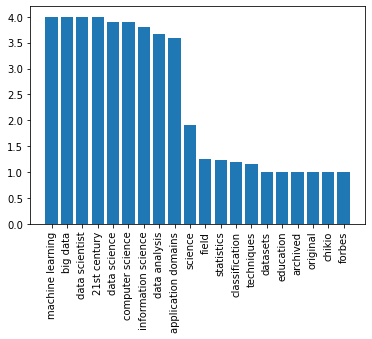

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Namun, ada cara yang lebih baik untuk memvisualisasikan frekuensi kata - menggunakan **Word Cloud**. Kita perlu menginstal pustaka lain untuk membuat word cloud dari daftar kata kunci kita.


In [71]:
!{sys.executable} -m pip install wordcloud

Objek `WordCloud` bertanggung jawab untuk menerima teks asli, atau daftar kata yang telah dihitung sebelumnya beserta frekuensinya, dan mengembalikan gambar, yang kemudian dapat ditampilkan menggunakan `matplotlib`:


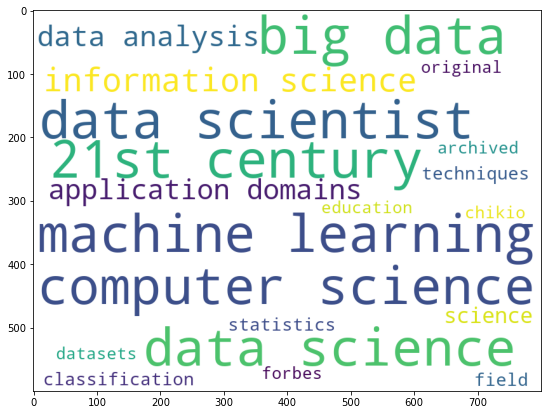

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Kita juga dapat memasukkan teks asli ke `WordCloud` - mari kita lihat apakah kita dapat memperoleh hasil yang serupa:


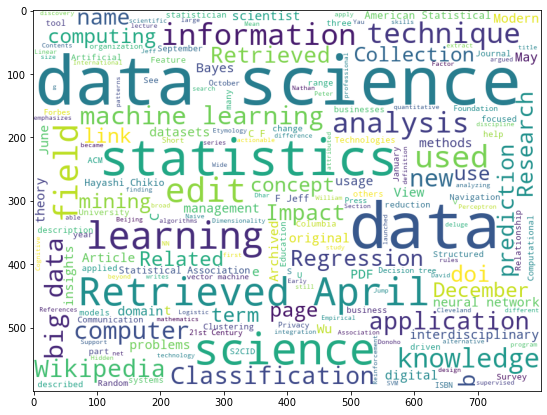

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Anda dapat melihat bahwa word cloud sekarang terlihat lebih menarik, tetapi juga mengandung banyak "noise" (misalnya, kata-kata yang tidak relevan seperti `Retrieved on`). Selain itu, kita mendapatkan lebih sedikit kata kunci yang terdiri dari dua kata, seperti *data scientist* atau *computer science*. Hal ini karena algoritma RAKE melakukan pekerjaan yang jauh lebih baik dalam memilih kata kunci yang relevan dari teks. Contoh ini menggambarkan pentingnya pra-pemrosesan dan pembersihan data, karena gambaran yang jelas pada akhirnya akan memungkinkan kita membuat keputusan yang lebih baik.

Dalam latihan ini, kita telah melalui proses sederhana untuk mengekstrak makna dari teks Wikipedia, dalam bentuk kata kunci dan word cloud. Contoh ini cukup sederhana, tetapi dengan baik menunjukkan semua langkah tipikal yang akan diambil seorang data scientist saat bekerja dengan data, mulai dari akuisisi data hingga visualisasi.

Dalam kursus kita, kita akan membahas semua langkah tersebut secara mendetail.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berupaya untuk memberikan hasil yang akurat, harap diperhatikan bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang berwenang. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemah manusia profesional. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
